In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="ticks")

In [2]:
path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"

online_rt = pd.read_csv(path, encoding='latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


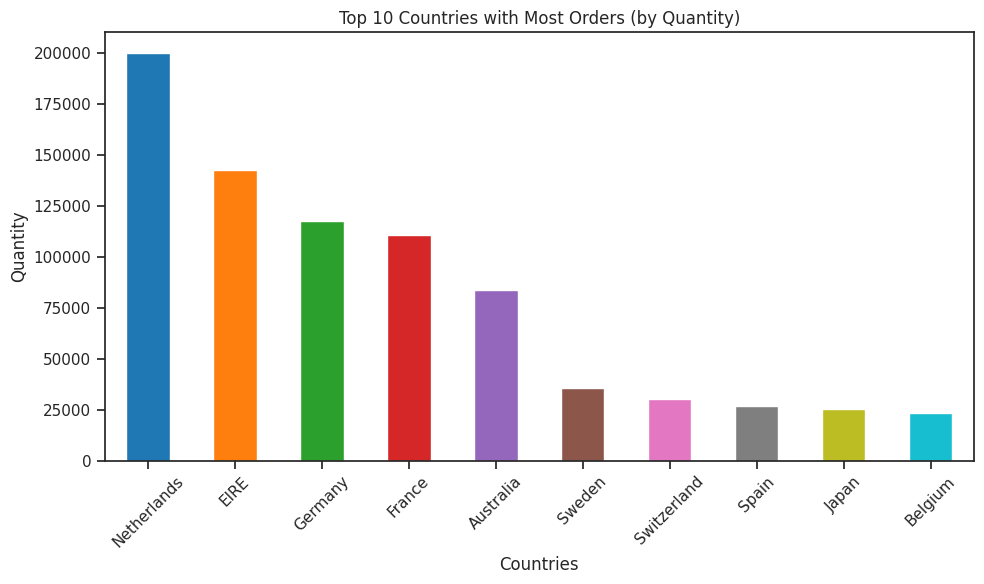

In [3]:
countries = online_rt.groupby("Country").sum(numeric_only=True)
top_countries = countries.sort_values(by="Quantity", ascending=False)[1:11]
colors = plt.cm.tab10.colors  # 10 distinct colors from matplotlib's colormap

# Plotting
top_countries["Quantity"].plot(kind="bar", figsize=(10, 6) , color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (by Quantity)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
online_rt = online_rt[online_rt["Quantity"] > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
custmoers = online_rt.groupby(["CustomerID","Country"]).sum(numeric_only=True)

custmoers = custmoers[custmoers.UnitPrice > 0]

custmoers["country"] = custmoers.index.get_level_values(1)

top_countries = ["Germany", "EIRE", "Netherlands"]

customers = custmoers[custmoers["country"].isin(top_countries)]

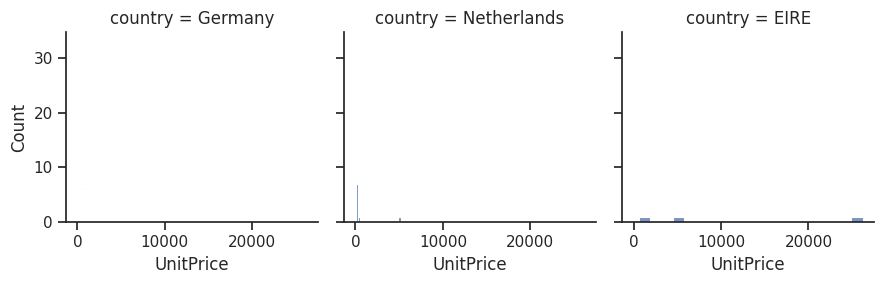

In [11]:
# prompt: gerenrate next code

import matplotlib.pyplot as plt
# Now, let's plot the distribution of UnitPrice for these top countries
g = sns.FacetGrid(customers, col="country")
g.map(sns.histplot, "UnitPrice", bins=20)
plt.show()

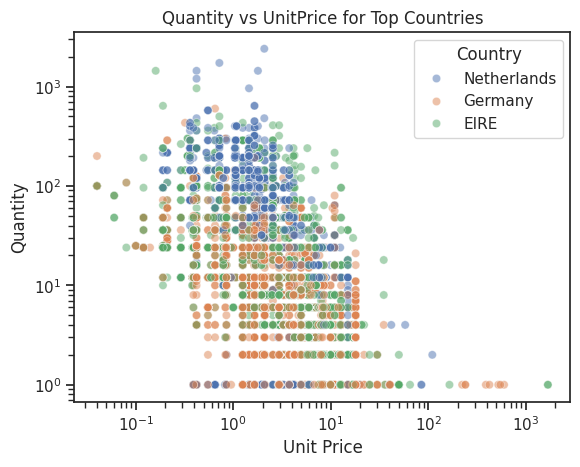

In [12]:
# prompt: next code

import matplotlib.pyplot as plt
# Filter the DataFrame to include only the top countries
top_countries_df = online_rt[online_rt['Country'].isin(top_countries)]

# Create a scatter plot using seaborn to visualize the relationship between Quantity and UnitPrice
sns.scatterplot(data=top_countries_df, x='UnitPrice', y='Quantity', hue='Country', alpha=0.5)
plt.title('Quantity vs UnitPrice for Top Countries')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.xscale('log') # Use log scale for UnitPrice as it might have a wide range
plt.yscale('log') # Use log scale for Quantity as it might have a wide range
plt.show()

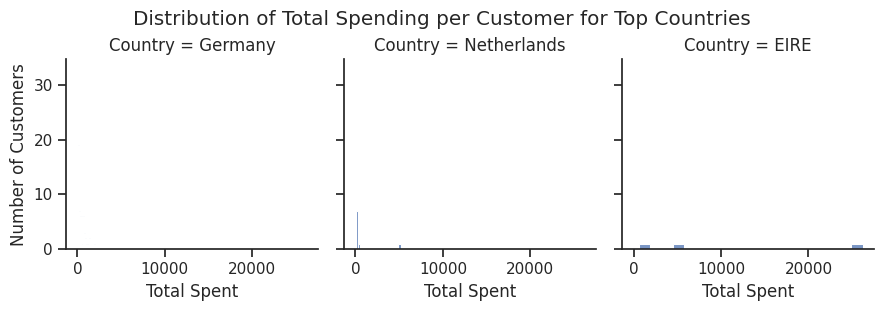

In [13]:
# prompt: next code

import matplotlib.pyplot as plt
# Group by CustomerID and Country and calculate the sum of Price
customers_total_spent = online_rt.groupby(["CustomerID", "Country"])["UnitPrice"].sum().reset_index()

# Rename the sum column to TotalSpent
customers_total_spent.rename(columns={"UnitPrice": "TotalSpent"}, inplace=True)

# Filter for the top countries
customers_total_spent_top = customers_total_spent[customers_total_spent["Country"].isin(top_countries)]

# Create a FacetGrid to show the distribution of TotalSpent for each country
g = sns.FacetGrid(customers_total_spent_top, col="Country")
g.map(sns.histplot, "TotalSpent", bins=20)

# Add titles and labels
g.fig.suptitle("Distribution of Total Spending per Customer for Top Countries", y=1.03)
g.set_axis_labels("Total Spent", "Number of Customers")

plt.show()


Most frequent customers by total spending in top countries:
      CustomerID      Country  TotalSpent
1888       14911         EIRE    26185.72
1342       14156         EIRE     5357.68
1698       14646  Netherlands     5176.09
108        12471      Germany     1978.17
110        12473      Germany     1398.42
231        12621      Germany     1350.70
114        12477      Germany     1314.96
111        12474      Germany     1215.04
1239       14016         EIRE      635.88
344        12759  Netherlands      305.47
352        12775  Netherlands      256.12
353        12778  Netherlands      175.47
361        12789  Netherlands       91.85


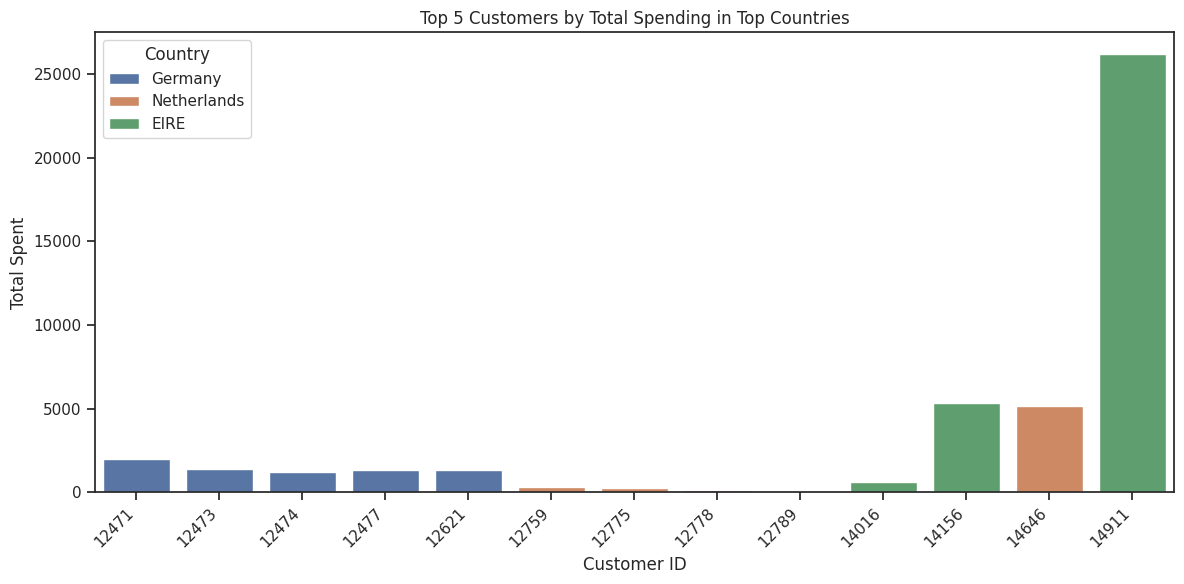


Analyzing purchases for top customers in EIRE:


/tmp/ipython-input-14-1592480673.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_per_customer = customer_item_counts.groupby("CustomerID").apply(lambda x: x.nlargest(5, "purchase_count")).reset_index(drop=True)



Analyzing purchases for top customers in Germany:


/tmp/ipython-input-14-1592480673.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_per_customer = customer_item_counts.groupby("CustomerID").apply(lambda x: x.nlargest(5, "purchase_count")).reset_index(drop=True)



Analyzing purchases for top customers in Netherlands:


/tmp/ipython-input-14-1592480673.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_per_customer = customer_item_counts.groupby("CustomerID").apply(lambda x: x.nlargest(5, "purchase_count")).reset_index(drop=True)


,CustomerID,StockCode,purchase_count,Description
0,12759,22382,3,LUNCH BAG SPACEBOY DESIGN
1,12759,22629,3,SPACEBOY LUNCH BOX
2,12759,85123A,3,WHITE HANGING HEART T-LIGHT HOLDER
3,12759,85123A,3,CREAM HANGING HEART T-LIGHT HOLDER
4,12759,POST,3,POSTAGE
5,12759,22045,2,SPACEBOY GIFT WRAP
6,12775,POST,5,POSTAGE
7,12775,35961,4,FOLKART ZINC HEART CHRISTMAS DEC
8,12775,84406B,4,CREAM CUPID HEARTS COAT HANGER
9,12775,21389,2,IVORY HANGING DECORATION BIRD


In [14]:
# prompt: next code

import pandas as pd
import matplotlib.pyplot as plt
# Identify the most frequent customers by TotalSpent in the top countries
most_frequent_customers = customers_total_spent_top.sort_values(by="TotalSpent", ascending=False).groupby("Country").head(5)

# Print the most frequent customers
print("Most frequent customers by total spending in top countries:")
print(most_frequent_customers)

# Visualize the spending of the most frequent customers
plt.figure(figsize=(12, 6))
sns.barplot(data=most_frequent_customers, x="CustomerID", y="TotalSpent", hue="Country", dodge=False)
plt.title("Top 5 Customers by Total Spending in Top Countries")
plt.xlabel("Customer ID")
plt.ylabel("Total Spent")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Explore the items purchased by the most frequent customers in each of the top countries
# We will get the top 5 customers for each country and then analyze their purchases.

top_customer_ids = most_frequent_customers.set_index("Country").groupby(level=0)["CustomerID"].apply(list)

# Iterate through each country and its top customer IDs
for country, customer_ids in top_customer_ids.items():
    print(f"\nAnalyzing purchases for top customers in {country}:")
    # Filter the original dataframe for the current country and its top customers
    country_top_customers_df = online_rt[(online_rt["Country"] == country) & (online_rt["CustomerID"].isin(customer_ids))]

    # Group by CustomerID and StockCode to find the most purchased items by each top customer
    customer_item_counts = country_top_customers_df.groupby(["CustomerID", "StockCode"]).size().reset_index(name="purchase_count")

    # For each customer, find the top 5 most purchased items
    top_items_per_customer = customer_item_counts.groupby("CustomerID").apply(lambda x: x.nlargest(5, "purchase_count")).reset_index(drop=True)

    # Merge with the original online_rt to get the Description
    top_items_with_description = pd.merge(top_items_per_customer, online_rt[["StockCode", "Description"]].drop_duplicates(), on="StockCode", how="left")

top_items_with_description


Analyzing most frequently purchased items across all customers in top countries:
Top 10 most frequently purchased items across all customers in top countries:
     StockCode                          Description  purchase_count
2476      POST                              POSTAGE             411
854      22326  ROUND SNACK BOXES SET OF4 WOODLAND              140
931      22423             REGENCY CAKESTAND 3 TIER             137
2474        C2                             CARRIAGE              98
856      22328   ROUND SNACK BOXES SET OF 4 FRUITS               91
1114     22629                  SPACEBOY LUNCH BOX               83
91       20719               WOODLAND CHARLOTTE BAG              80
253      21212      PACK OF 72 RETROSPOT CAKE CASES              80
1044     22554     PLASTERS IN TIN WOODLAND ANIMALS              80
1668     23245           SET OF 3 REGENCY CAKE TINS              78


/tmp/ipython-input-15-1922953303.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_items_all_customers, x="Description", y="purchase_count", palette="viridis")


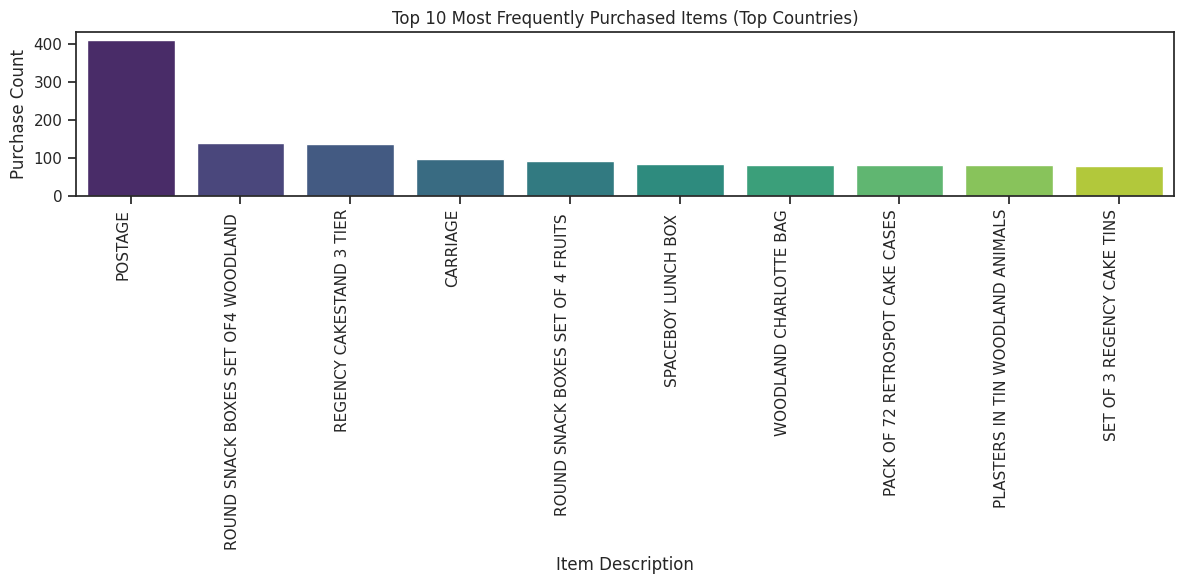


Analyzing average purchase value per customer in top countries:
Average spending per customer in top countries:
       Country    TotalSpent
0         EIRE  10726.426667
1      Germany    356.724894
2  Netherlands    694.192222


/tmp/ipython-input-15-1922953303.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_spending_per_customer_top, x="Country", y="TotalSpent", palette="magma")


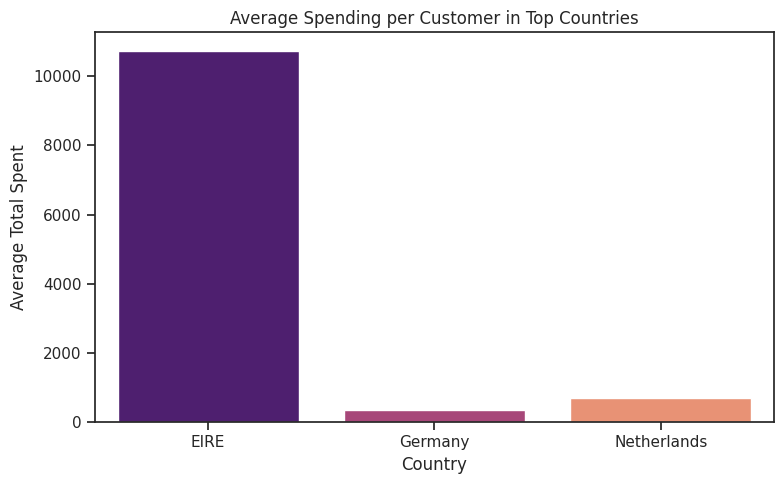


Analyzing distribution of order values in top countries:


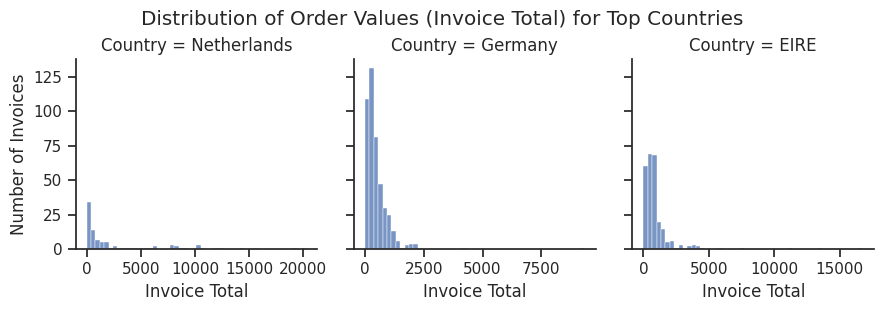


Analyzing peak purchase times in top countries:


/tmp/ipython-input-15-1922953303.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  online_rt["InvoiceDate"] = pd.to_datetime(online_rt["InvoiceDate"])


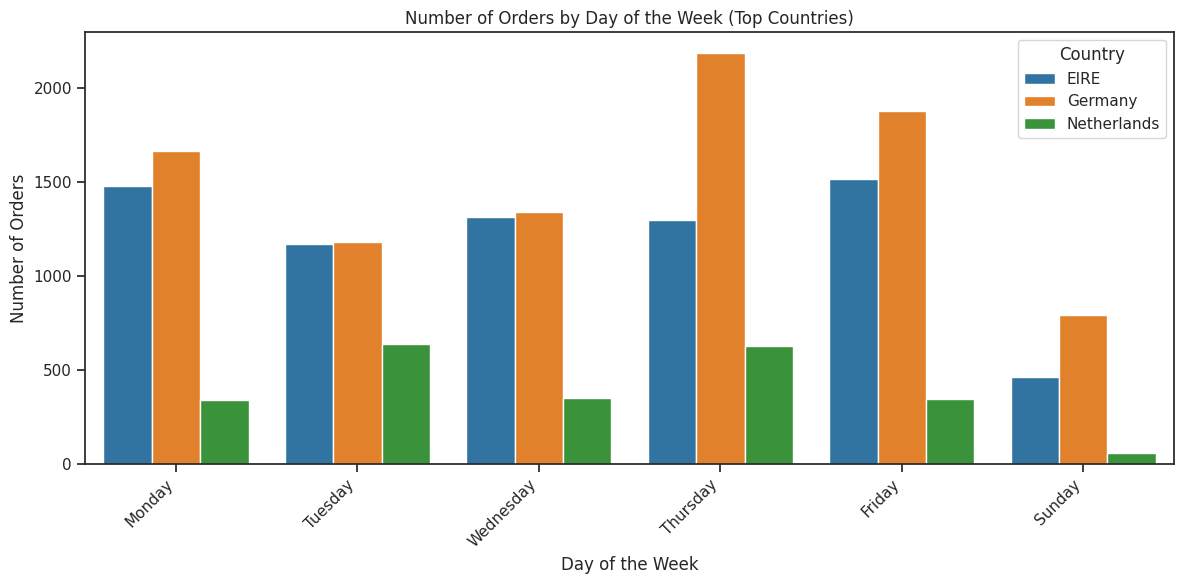

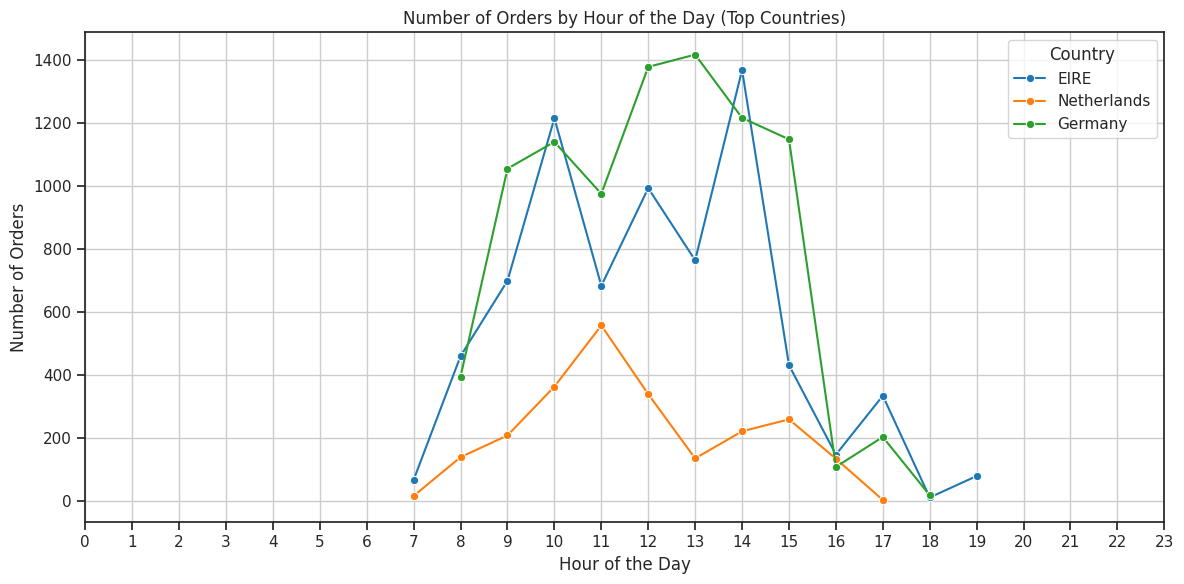

In [15]:
# prompt: next code

import pandas as pd
import matplotlib.pyplot as plt
# Analyze the most frequently purchased items across all customers in the top countries
print("\nAnalyzing most frequently purchased items across all customers in top countries:")

# Filter for the top countries
top_countries_all_customers_df = online_rt[online_rt["Country"].isin(top_countries)]

# Group by StockCode and Description and count the occurrences
item_counts_all_customers = top_countries_all_customers_df.groupby(["StockCode", "Description"]).size().reset_index(name="purchase_count")

# Find the top 10 most purchased items across all customers in these countries
top_10_items_all_customers = item_counts_all_customers.nlargest(10, "purchase_count")

print("Top 10 most frequently purchased items across all customers in top countries:")
print(top_10_items_all_customers)

# Visualize the top 10 most frequently purchased items
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_items_all_customers, x="Description", y="purchase_count", palette="viridis")
plt.title("Top 10 Most Frequently Purchased Items (Top Countries)")
plt.xlabel("Item Description")
plt.ylabel("Purchase Count")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

# Examine the average purchase value per customer in the top countries
print("\nAnalyzing average purchase value per customer in top countries:")

# Calculate the average spending per customer in the top countries
average_spending_per_customer_top = customers_total_spent_top.groupby("Country")["TotalSpent"].mean().reset_index()

print("Average spending per customer in top countries:")
print(average_spending_per_customer_top)

# Visualize the average spending per customer
plt.figure(figsize=(8, 5))
sns.barplot(data=average_spending_per_customer_top, x="Country", y="TotalSpent", palette="magma")
plt.title("Average Spending per Customer in Top Countries")
plt.xlabel("Country")
plt.ylabel("Average Total Spent")
plt.tight_layout()
plt.show()

# Investigate the distribution of order values in the top countries
print("\nAnalyzing distribution of order values in top countries:")

# Calculate the total value for each invoice (order)
online_rt["InvoiceTotal"] = online_rt["Quantity"] * online_rt["UnitPrice"]

# Group by InvoiceNo and Country to get the total value per invoice
invoice_totals_top = online_rt[online_rt["Country"].isin(top_countries)].groupby(["InvoiceNo", "Country"])["InvoiceTotal"].sum().reset_index()

# Create a FacetGrid to show the distribution of InvoiceTotal for each country
g = sns.FacetGrid(invoice_totals_top, col="Country", sharex=False)
g.map(sns.histplot, "InvoiceTotal", bins=50)

# Add titles and labels
g.fig.suptitle("Distribution of Order Values (Invoice Total) for Top Countries", y=1.03)
g.set_axis_labels("Invoice Total", "Number of Invoices")

plt.show()

# Look into the peak purchase times (day of the week, hour of the day)
print("\nAnalyzing peak purchase times in top countries:")

# Convert InvoiceDate to datetime objects
online_rt["InvoiceDate"] = pd.to_datetime(online_rt["InvoiceDate"])

# Extract day of the week and hour of the day
online_rt["DayOfWeek"] = online_rt["InvoiceDate"].dt.dayofweek  # Monday=0, Sunday=6
online_rt["Hour"] = online_rt["InvoiceDate"].dt.hour

# Filter for the top countries
top_countries_time_analysis = online_rt[online_rt["Country"].isin(top_countries)]

# Group by DayOfWeek and Country and count the number of invoices
day_of_week_counts = top_countries_time_analysis.groupby(["DayOfWeek", "Country"]).size().reset_index(name="invoice_count")

# Map day of the week numbers to names for better readability
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_counts["DayOfWeek"] = day_of_week_counts["DayOfWeek"].map(lambda x: day_names[x])

# Create a plot to visualize purchase counts by day of the week for each country
plt.figure(figsize=(12, 6))
sns.barplot(data=day_of_week_counts, x="DayOfWeek", y="invoice_count", hue="Country", palette="tab10")
plt.title("Number of Orders by Day of the Week (Top Countries)")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Group by Hour and Country and count the number of invoices
hour_counts = top_countries_time_analysis.groupby(["Hour", "Country"]).size().reset_index(name="invoice_count")

# Create a plot to visualize purchase counts by hour of the day for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_counts, x="Hour", y="invoice_count", hue="Country", marker="o", palette="tab10")
plt.title("Number of Orders by Hour of the Day (Top Countries)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()